<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/DS_C3_SC2_EDERSALAZAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Contexto del reto:
**Bertha** es una empresaria mexicana que tiene una cadena de restaurantes de comida rápida, y desea abrir una nueva sucursal que se encuentre dentro del rango de entregas a domicilio de la cadena Costco®, ya que ahí compra la materia prima para preparar los alimentos. Por ello, te han contratado para que indiques en qué región (o regiones) del país _**NO**_ sería conveniente poner otra sucursal debido a la falta de cobertura de entregas a domicilio.



## Librerias que vamos a utilizar

In [82]:
import geopandas as geop
import pandas as pd
import matplotlib.pyplot as plt

## Carga de datos de la República Mexicana

In [190]:
mex =geop.read_file('/content/drive/MyDrive/Colab Notebooks/datos/datos_reto/Copia de mexican-states.shp')
mex.head()

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."


## Carga de datos de localización de sucursales de Cosco

In [191]:
costco= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/datos_reto/tiendasCostco.csv')
costco.columns

Index(['id', ' nombre', ' direccion', ' ubicacion', ' latitud', ' longitud',
       ' tel centro llantero'],
      dtype='object')

### Datos csv a GeoDataframe

In [192]:
costco=geop.GeoDataFrame(costco,geometry=geop.points_from_xy(costco[' longitud'],costco[' latitud']))
costco.head()

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318,POINT (-98.23779 19.03350)
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN,POINT (-99.13865 19.28436)
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523,POINT (-99.23343 18.93448)
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691,POINT (-99.13006 19.48170)
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN,POINT (-99.19072 19.38724)


## Selección de región a la que pertenece y separando por región
  -	**Centro**: Tlaxcala, Puebla, CDMX, Morelos, Estado de México e Hidalgo.
  -	**Centro Oeste**: Jalisco, Michoacán, Colima, Aguascalientes, Nayarit, Zacatecas, San Luis Potosí, Guanajuato y Querétaro.
  -	**Noreste**: Chihuahua, Coahuila, Nuevo León, Tamaulipas y Durango.
  -	**Noroeste**: Baja California Norte, Baja California Sur, Sonora y Sinaloa.
  -	**Sureste**: Guerrero, Veracruz, Oaxaca, Tabasco, Chiapas, Campeche, Yucatán y Quintana Roo.

In [193]:
# reduciendo a columnas de interes
mex['Región']= 0
mex=mex[['name','Región','geometry']]


region= ['centro','centro oeste','noreste','noroeste','sureste']
centro=['Tlaxcala', 'Puebla','México','Morelos', 'Hidalgo']
centro_oeste=['Jalisco', 'Michoacán', 'Colima', 'Aguascalientes', 'Nayarit', 'Zacatecas', 'San Luis Potosí', 'Guanajuato', 'Querétaro']
noreste= ['Chihuahua', 'Coahuila', 'Nuevo León', 'Tamaulipas', 'Durango']
noroeste= ['Baja', 'Sonora', 'Sinaloa']
sureste= ['Guerrero', 'Veracruz', 'Oaxaca', 'Tabasco', 'Chiapas', 'Campeche', 'Yucatán', 'Quintana Roo']
reg=[centro,centro_oeste,noreste,noroeste,sureste]
for i in range(len(reg)):
  for ii in reg[i]:
    est= mex[mex['name'].str.contains(ii,case=False) == True]
    if est.empty != True:
      for n in est.index:
        mex['Región'].iloc[n]=region[i]


<ipython-input-193-b72c8749e438>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mex['Región'].iloc[n]=region[i]


## Asegurando que se utilicen el mismo sistema de referencia coordenado
Utilizamos $epsg=3395$ que utiliza metros como medidad de distancia

In [194]:
costco=costco.set_crs(mex.crs)
mex=mex.to_crs(epsg=3395)
costco= costco.to_crs(mex.crs)

In [195]:
print(mex.crs,costco.crs,sep='\n')

EPSG:3395
EPSG:3395


## Creando el buffer de 120 km alrededor de cada sucursal

In [197]:
costco['geometry']=costco.buffer(120000)

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318,"POLYGON ((-10815781.179 2144952.355, -10816359..."
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN,"POLYGON ((-10916064.551 2174338.736, -10916642..."
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523,"POLYGON ((-10926614.869 2133365.534, -10927192..."
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691,"POLYGON ((-10915108.091 2197487.393, -10915685..."
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN,"POLYGON ((-10921860.248 2186403.224, -10922438..."


## Grafica de las intersección de las regiones a partir de la localización de las sucursales

In [ ]:
interseccion= geop.overlay(mex,costco,how='intersection')

Text(0.5, 1.0, 'Área de entregas a domicilo de Costco por región')

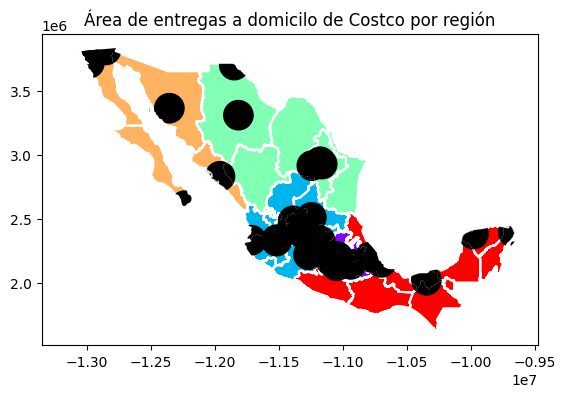

In [213]:
ax= mex.plot(column='Región',cmap='rainbow')
mex.boundary.plot(ax=ax,zorder=2,color='white')
interseccion.plot(ax=ax,color='black',zorder=2)
plt.title('Área de entregas a domicilo de Costco por región')

## Para localizar las capitales de las regiones

cargamos un archivo con la ubicación de las capitales mexicanas

In [214]:
capitales= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/geopandas/mexican-capitals.csv')
capitales=geop.GeoDataFrame(capitales, geometry=geop.points_from_xy(capitales.Long,capitales.Lat))

In [215]:
capitales=capitales.set_crs(mex.crs)

Realizamos de nuevo la visualización gráfica, ahora con